# Impoting necessary libraries


In [22]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Downloading Apple Stock Data

In [23]:
apple_data = yf.download('AAPL', start='2018-01-01', end='2018-06-01')

apple_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.524349,40.533761,39.818596,40.030324,102223600
2018-01-03,40.517281,41.063065,40.453765,40.587857,118071600
2018-01-04,40.705490,40.809001,40.482002,40.590216,89738400
2018-01-05,41.168930,41.255972,40.710191,40.801939,94640000
2018-01-08,41.016014,41.312429,40.917206,41.016014,82271200


In [24]:
close = apple_data['Close']

close.head()


Ticker,AAPL
Date,
2018-01-02,40.524349
2018-01-03,40.517281
2018-01-04,40.705490
2018-01-05,41.168930
2018-01-08,41.016014


In [25]:
returns = close.pct_change().dropna()

max_lag = 8
lagged_returns = pd.DataFrame()

for lag in range(1, max_lag + 1):
    lagged_returns[f'Lag {lag}'] = returns.shift(lag)

lagged_returns = lagged_returns.dropna()


lagged_returns.head()


,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,Lag 8
Date,,,,,,,,
2018-01-16,0.010327,0.005680,-0.000229,-0.000115,-0.003714,0.011385,0.004645,-0.000174
2018-01-17,-0.005082,0.010327,0.005680,-0.000229,-0.000115,-0.003714,0.011385,0.004645
2018-01-18,0.016516,-0.005082,0.010327,0.005680,-0.000229,-0.000115,-0.003714,0.011385
2018-01-19,0.000893,0.016516,-0.005082,0.010327,0.005680,-0.000229,-0.000115,-0.003714
2018-01-22,-0.004463,0.000893,0.016516,-0.005082,0.010327,0.005680,-0.000229,-0.000115


In [20]:
correlation_matrix = lagged_returns.corr()

correlation_matrix


,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,Lag 8
Lag 1,1.000000,0.116582,-0.020833,0.147152,0.190569,-0.106572,-0.047697,0.072322
Lag 2,0.116582,1.000000,0.115838,-0.020886,0.145990,0.192689,-0.106340,-0.047243
Lag 3,-0.020833,0.115838,1.000000,0.116152,-0.021033,0.146276,0.191972,-0.105348
Lag 4,0.147152,-0.020886,0.116152,1.000000,0.116417,-0.021699,0.146292,0.191870
Lag 5,0.190569,0.145990,-0.021033,0.116417,1.000000,0.114809,-0.022605,0.147036
Lag 6,-0.106572,0.192689,0.146276,-0.021699,0.114809,1.000000,0.116736,-0.024279
Lag 7,-0.047697,-0.106340,0.191972,0.146292,-0.022605,0.116736,1.000000,0.117448
Lag 8,0.072322,-0.047243,-0.105348,0.191870,0.147036,-0.024279,0.117448,1.000000


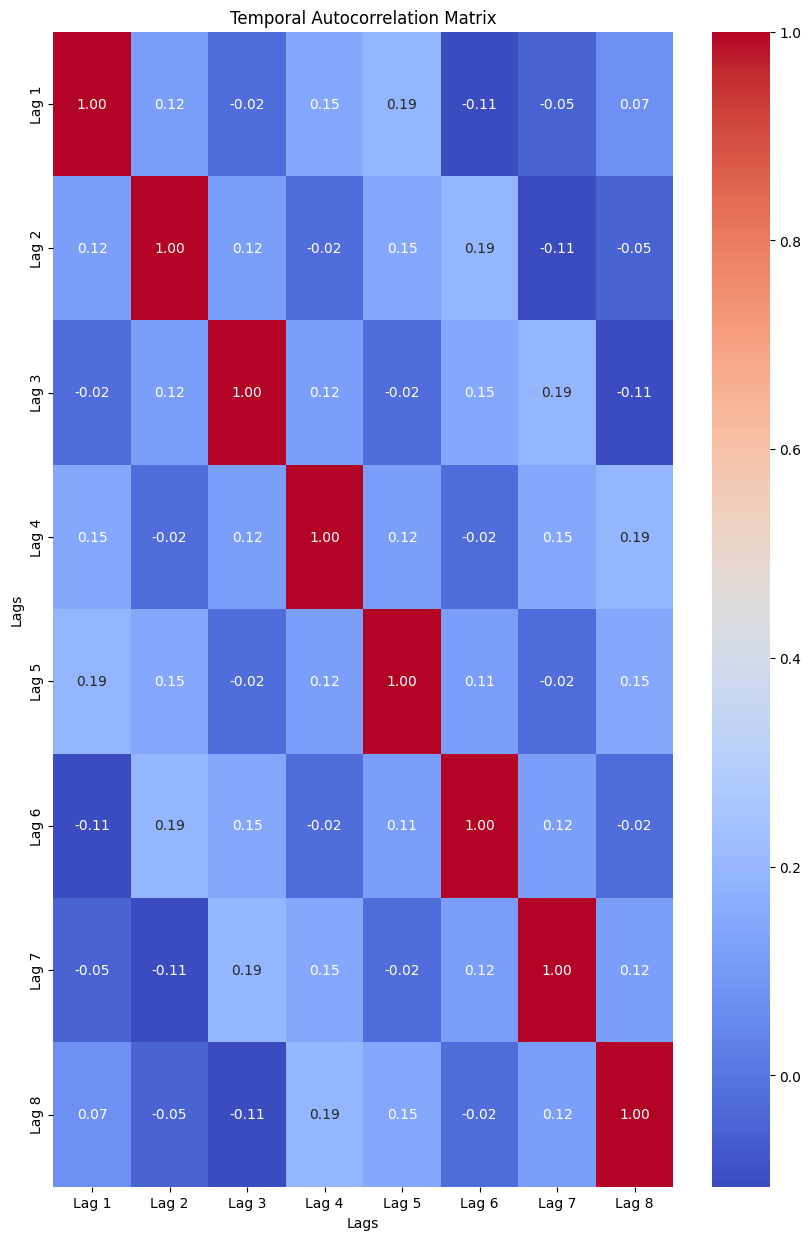

In [21]:
plt.figure(figsize=(10, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Temporal Autocorrelation Matrix')
plt.xlabel('Lags')
plt.ylabel('Lags')
plt.show()
